In [65]:
from mynotebooks import *
%matplotlib inline

#exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,1.5),obj_type="box",salientMode="minimum", name='human') # minimum
#learn = RobotLearning.LearningModel(exp)
#errMan = learn.errorManager

ferr,feval,fgoals = [],[],[]
folder = './data/twoarms/error/'
for fn in os.listdir(folder):
    if(fn.endswith('error.data')): ferr.append(folder + fn)
    if(fn.endswith('eval.data')): feval.append(folder + fn)
    if(fn.endswith('goals.data')): fgoals.append(folder + fn)
        
print ferr

['./data/twoarms/error/dm-1-1-500-5-model2-error.data', './data/twoarms/error/dm-1-1-500-5-model2-unctr-error.data', './data/twoarms/error/m-0-2500-model3-error.data', './data/twoarms/error/m-0-2500-model3-unctr-error.data']


./data/twoarms/error/dm-1-1-1000-1-model2-error.data


../_utils/VectorFigUtils.py:150: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(yerror != None):


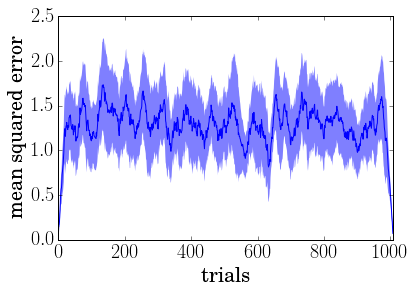

./data/twoarms/error/dm-1-1-1000-10-model2-error.data


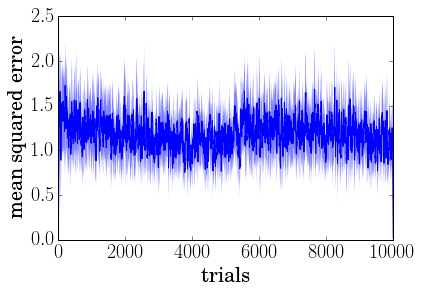

./data/twoarms/error/dm-1-1-1000-5-model2-error.data


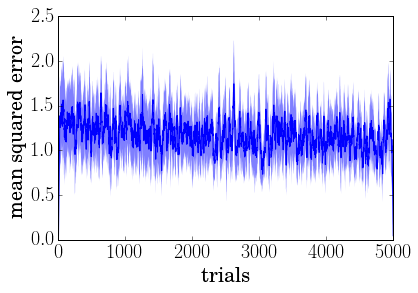

./data/twoarms/error/dm-1000-1-0-0-model2-error.data


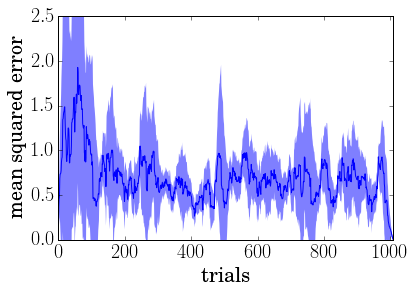

./data/twoarms/error/dm-1000-10-0-0-model2-error.data


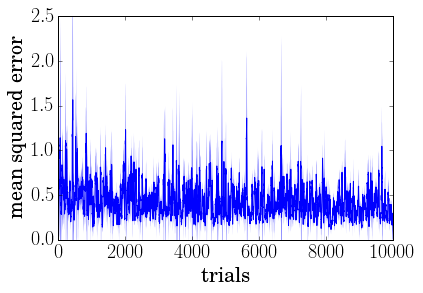

./data/twoarms/error/dm-1000-5-0-0-model2-error.data


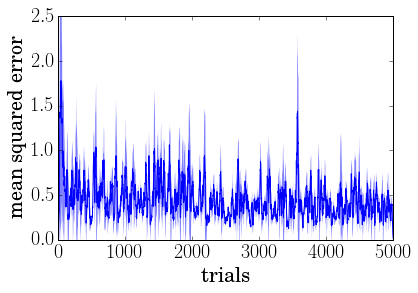

./data/twoarms/error/m-1-10000-model3-error.data


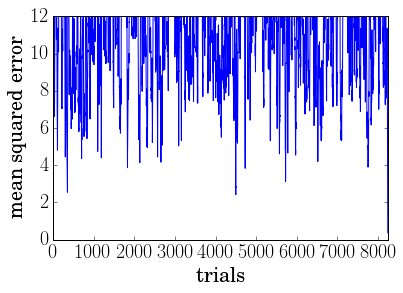

./data/twoarms/error/m-10000-0-model3-error.data


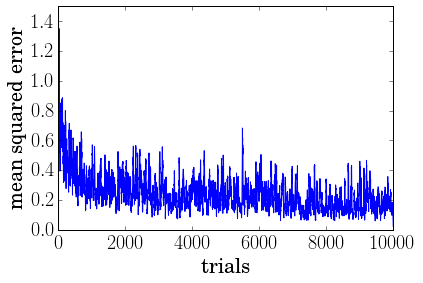

In [2]:
ylim = [2.5,2.5,2.5,2.5,2.5,2.5,12,1.5]
for i,f in enumerate(ferr):
    print f
    errlist = pickle.load(open(f, "rb"))
    error_mean = [e[0] for e in errlist]
    error_var = [e[1] for e in errlist]
    
    w = 20
    error_mean = np.convolve(error_mean, np.ones(w)/w)
    error_var = np.convolve(error_var, np.ones(w)/w)
    
    plt.close()
    fig, ax = Box2DWorld.makeFigure()
    plt.axes(xlim=[0,len(error_mean)],ylim=[0,ylim[i]])
    VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,error_var,xlabel="trials",ylabel="mean squared error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,xlabel="trials",ylabel="mean error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_var,xlabel="trials",ylabel="mean error")
    plt.show()

./data/twoarms/error/dm-1-1-500-5-model2-eval.data


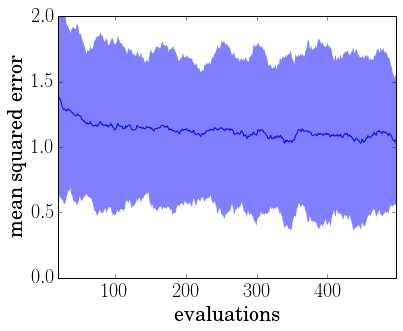

./data/twoarms/error/dm-1-1-500-5-model2-unctr-eval.data


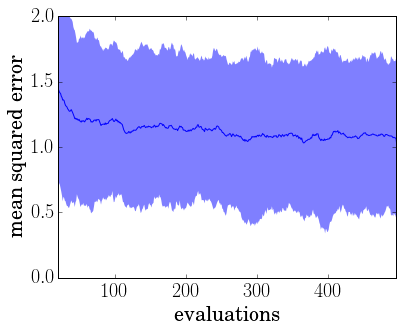

./data/twoarms/error/m-0-2500-model3-eval.data


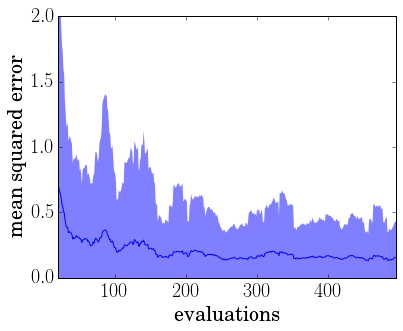

./data/twoarms/error/m-0-2500-model3-unctr-eval.data


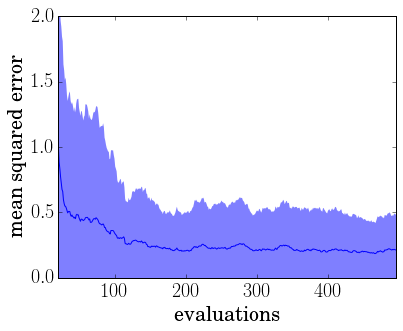

In [69]:
ylim = [2,2,2,2,2,2,1,1]

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for i,f in enumerate(feval):
    print f
    errlist = pickle.load(open(f, "rb"))
    error_mean = [e[0] for e in errlist]
    error_var = [e[1] for e in errlist]
    error_minmax = np.array([e[3] for e in errlist]) - np.array([e[2] for e in errlist])
        
    w = 20
    error_mean = np.convolve(error_mean, np.ones(w)/w)
    error_var = np.convolve(error_var, np.ones(w)/w)
    error_minmax = np.convolve(error_minmax, np.ones(w)/w)
    
    #plt.close()
    fig, ax = Box2DWorld.makeFigure(size=[6,5])
    #plt.gca().tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.3)
    plt.axes(xlim=[w,len(error_mean)-w],ylim=[0,ylim[i]])
    VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,error_minmax,xlabel="evaluations",ylabel="mean squared error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,xlabel="trials",ylabel="mean error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_var,xlabel="trials",ylabel="mean error")
    #ax.set_aspect('auto')
    fig.savefig('imgs/learn%d.png'%i, dpi=300, format='png')
    plt.show()

./data/twoarms/error/dm-1-1-1000-1-model2-goals.data
[-2.1600000000000001, 0.40000000000000002, 1.54, 1.3500000000000001, -0.70174657668435891, 0.057664244438449197, -0.82285955270950151, -0.22897235276562178]
[1.27, 0.70999999999999996, 2.0600000000000001, 0.73999999999999999, -0.77974057859987389, -0.12478479842523638, 0.42745196366292393, 0.68852361921513738]


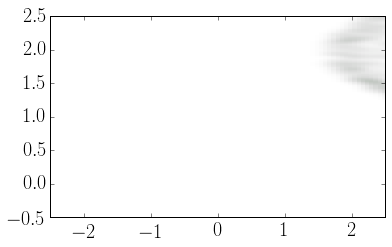

./data/twoarms/error/dm-1-1-1000-10-model2-goals.data
[-2.1800000000000002, 0.33000000000000002, 1.0600000000000001, 0.44, -0.092638531951409364, 0.88438786669059843, -0.81723615019837115, -0.92243766199433708]
[1.3300000000000001, 0.52000000000000002, 2.1099999999999999, 0.60999999999999999, -0.75711426335792908, 0.8683938423533879, -0.743838453928094, 0.01792596872717156]


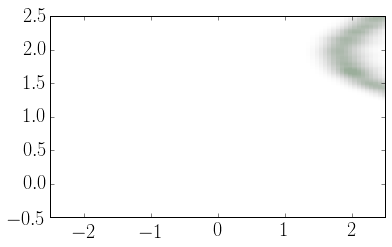

./data/twoarms/error/dm-1-1-1000-5-model2-goals.data
[-2.1699999999999999, 0.34999999999999998, -1.21, 0.84999999999999998, -0.57779858048159882, -0.94550214207298833, -0.39595557434027806, -0.73715961600370394]
[1.3200000000000001, 0.54000000000000004, 2.1600000000000001, 0.38, -0.024954917219285111, 0.28115672207792941, -0.63486992722039703, -0.76881313601180246]


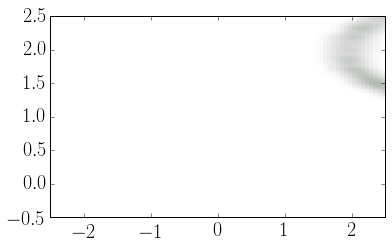

./data/twoarms/error/m-1-10000-model3-goals.data
[-3.9994550769038515, 0.23635143988257257, 2.4306110476989851, 3.7586188886028782]
[3.9969189496656075, -0.15705245095643905, -1.8529658894171388, 1.0990663272533041]


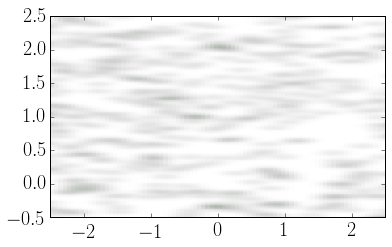

In [90]:
for i,f in enumerate(fgoals):
    goals = pickle.load(open(f, "rb"))
    mat = SensoriMotor.Matrix()
    if(len(goals) > 1):
        print f
        n = len(goals[0])
        ming,maxg = [99]*n,[-99]*n
        for j,g in enumerate(goals):
            mat.add(g[0],g[1])
            ming,maxg = min(ming,list(g)),max(maxg,list(g))
        print ming
        print maxg
        fig, ax = Box2DWorld.makeFigure(axes=[-2.5,2.5,-0.5,2.5])
        VectorFigUtils.drawMaps(ax,100*mat.m,extent=[-15,15,-1.5,6],alpha1=0.4)
        plt.show()

In [87]:
print list(g)
min(ming,list(g))

[0.20999999999999999, 0.5, -0.19, 0.81999999999999995, -0.50155243619628376, -0.81506941602965055, 0.45542903885611885, -0.23359354014457523]


[0.20999999999999999,
 0.5,
 -0.19,
 0.81999999999999995,
 -0.50155243619628376,
 -0.81506941602965055,
 0.45542903885611885,
 -0.23359354014457523]

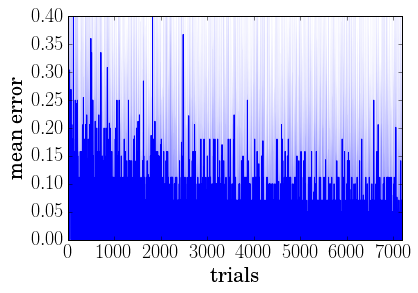

In [12]:



s = SM.getSalient(6)
errlist =  s.errorManager.load_errors(6)
error_mean = [e[0] for e in errlist]
error_var = [e[1] for e in errlist]
n = len(error_mean)

plt.close()
plt.axes(xlim=[0,n],ylim=[0,.4])
VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,error_var,xlabel="trials",ylabel="mean error")
plt.show()